In [1]:
%load_ext line_profiler

In [2]:
import numpy as np
import scipy as sp
from scipy.special import spence
import matplotlib.pyplot as plt
import uncertainties
from uncertainties import unumpy as unp

In [3]:
from effort2.formfactors.formFactorBtoC import BLPRXP, BToDBLPRXP, BToDStarBLPRXP, BToDStarBGL
from effort2.rates.BtoP_MassEffects import BtoP
from effort2.rates.BtoV_MassEffects import BtoV
from effort2.rates.BtoV import BtoV as BtoV_ZMA

# Setup 

Get fit result from C++ code and parse it properly into the python classes.

## BLPRXP

In [4]:
central =  np.array([0.038236, 1.100017, 82.442279, -0.057684, 0.000716, 0.032952, 0.267054, -0.117059, 4.709993, 3.399996, 0.208287, 0.008367, 0.401723, 0.129994 ]) 
errors = np.array([0.000482, 0.001000, 6.638924, 0.019885, 0.019662, 0.018954, 0.027606, 0.176217, 0.049999, 0.049999, 0.727813, 0.264900, 0.295117, 0.020000 ])
cor = np.array([[1.000000, 0.009051, 0.229939, 0.051798, 0.130253, -0.161319, 0.091392, -0.032673, 0.000000, -0.000000, 0.021283, 0.123246, 0.099580, -0.000000 ],[0.009051, 1.000000, -0.002223, -0.002156, -0.003740, 0.006723, -0.000682, 0.009519, 0.000000, 0.000000, 0.000238, -0.000113, -0.011944, 0.000000 ],[0.229939, -0.002223, 1.000000, -0.085720, 0.244750, 0.267494, 0.144089, 0.150159, 0.000000, -0.000000, -0.208916, -0.230776, -0.088191, -0.000000 ],[0.051798, -0.002156, -0.085720, 1.000000, -0.017820, 0.036327, -0.002999, 0.051180, 0.000000, -0.000000, -0.147005, 0.001209, -0.066755, -0.000000 ],[0.130253, -0.003740, 0.244750, -0.017820, 1.000000, 0.055347, -0.001361, 0.063582, 0.000000, -0.000000, -0.153584, -0.115402, -0.085245, -0.000000 ],[-0.161319, 0.006723, 0.267494, 0.036327, 0.055347, 1.000000, 0.009328, -0.161007, 0.000000, 0.000000, 0.004281, -0.424823, 0.209663, 0.000000 ],[0.091392, -0.000682, 0.144089, -0.002999, -0.001361, 0.009328, 1.000000, 0.039093, 0.000000, 0.000000, -0.090401, -0.065604, 0.108295, -0.000000 ],[-0.032673, 0.009519, 0.150159, 0.051180, 0.063582, -0.161007, 0.039093, 1.000000, 0.000000, -0.000000, -0.903948, -0.719361, -0.867228, -0.000000 ],[0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 1.000000, -0.000000, -0.000000, -0.000000, -0.000000, -0.000000 ],[-0.000000, 0.000000, -0.000000, -0.000000, -0.000000, 0.000000, 0.000000, -0.000000, -0.000000, 1.000000, 0.000000, 0.000000, 0.000000, 0.000000 ],[0.021283, 0.000238, -0.208916, -0.147005, -0.153584, 0.004281, -0.090401, -0.903948, -0.000000, 0.000000, 1.000000, 0.874460, 0.902600, 0.000000 ],[0.123246, -0.000113, -0.230776, 0.001209, -0.115402, -0.424823, -0.065604, -0.719361, -0.000000, 0.000000, 0.874460, 1.000000, 0.713234, 0.000000 ],[0.099580, -0.011944, -0.088191, -0.066755, -0.085245, 0.209663, 0.108295, -0.867228, -0.000000, 0.000000, 0.902600, 0.713234, 1.000000, 0.000000 ],[-0.000000, 0.000000, -0.000000, -0.000000, -0.000000, 0.000000, -0.000000, -0.000000, -0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 1.000000 ]])

cov = np.outer(errors, errors) * cor
pars = {}
(pars["Vcb"],pars["RhoSq"],pars["Cur"],pars["chi21"],pars["chi2p"],pars["chi3p"],pars["eta1"],pars["etap"],pars["mb1S"],pars["dmbc"],pars["beta21"],pars["beta3p"],pars["phi1p"],pars["la2"]) = uncertainties.correlated_values(central,cov)

In [5]:
mtau = 1.77682

Initialize FF classes.

In [6]:
FF_BToD     = BToDBLPRXP(**pars)
FF_BToD_tau = BToDBLPRXP(**pars, m_L=mtau)
FF_BToDStar     = BToDStarBLPRXP(**pars)
FF_BToDStar_tau = BToDStarBLPRXP(**pars, m_L=mtau)

Initialize Rate classes, using the FF defined above.

In [7]:
BToD     = BtoP(FF_BToD, pars["Vcb"])
BToD_tau = BtoP(FF_BToD_tau, pars["Vcb"])

BToDStar     = BtoV(FF_BToDStar, pars["Vcb"])
BToDStar_tau = BtoV(FF_BToDStar_tau, pars["Vcb"])

BToDStar_ZMA = BtoV_ZMA(FF=FF_BToDStar, Vcb=pars["Vcb"], eta_EW=1)

## BGL

In [8]:
BGL_Dstlv_CENTRAL_VALUES = np.array([1.00e-3, -2.35e-3, 0.511e-3, 0.67e-03, 3.0e-04, -3.68e-03])
BGL_Dstlv_STAT_222 = np.array([0.02e-3, 0.61e-3, 0.004e-3, 0.17e-3, 0.06e-3, 1.26e-3])
BGL_Dstlv_SYS_222 = np.array([0.02e-3, 0.66e-3, 0.013e-3, 0.30e-3, 0.08e-3, 1.2e-3])


BGL_Dstlv_CORRELATION_STAT_222 = np.array(
    [
        [1.000, -0.937, -0.128, 0.069, -0.081, 0.161],  # a0
        [-0.937, 1.000, 0.127, -0.222, 0.110, -0.192],  # a1
        [-0.218, 0.127, 1.000, -0.800, -0.751, 0.624],  # b0
        [0.069, -0.222, -0.800, 1.000, 0.443, -0.354],  # b1
        [-0.081, 0.110, -0.751, 0.443, 1.000, -0.978],  # c1
        [0.161, -0.192, 0.624, -0.354, -0.978, 1.000],  # c2
    ]
)

BGL_Dstlv__CORRELATION_SYS_222 = np.array(
    [
        [1.000, -0.940, -0.132, 0.085, -0.077, 0.158],  # a0
        [-0.940, 1.000, 0.129, -0.228, 0.107, -0.189],  # a1
        [-0.132, 0.129, 1.000, -0.806, -0.755, 0.629],  # b0
        [0.085, -0.228, -0.806, 1.000, 0.452, -0.362],  # b1
        [-0.077, 0.107, -0.755, 0.452, 1.000, -0.977],  # c1
        [0.158, -0.189, 0.629, -0.362, -0.977, 1.000],  # c2
    ]
)

BGL_Dstlv_COVARIANCE_STAT_222 = np.outer(BGL_Dstlv_STAT_222, BGL_Dstlv_STAT_222) * BGL_Dstlv_CORRELATION_STAT_222
BGL_Dstlv_COVARIANCE_SYS_222 = np.outer(BGL_Dstlv_SYS_222, BGL_Dstlv_SYS_222) * BGL_Dstlv__CORRELATION_SYS_222
BGL_Dstlv_TOTAL_COVARIANCE = BGL_Dstlv_COVARIANCE_STAT_222 + BGL_Dstlv_COVARIANCE_SYS_222


bgl_parameters = uncertainties.correlated_values(BGL_Dstlv_CENTRAL_VALUES, BGL_Dstlv_TOTAL_COVARIANCE)

In [22]:
FF_BGL_BToDStar = BToDStarBGL(
    m_B=BToDStar_ZMA.mB,  # Not nice, but ensure that kinematics are the same
    m_V=BToDStar_ZMA.mV,  # Not nice, but ensure that kinematics are the same
    exp_coeff_a = bgl_parameters[0:2],
    exp_coeff_b = bgl_parameters[2:4],
    exp_coeff_c = bgl_parameters[4:6],
)

BToDStar_BGL_ZMA = BtoV_ZMA(FF=FF_BGL_BToDStar, Vcb=1, eta_EW=1)

# Calculate and Plot Results

In [11]:
wrD    = np.linspace(*FF_BToD.kinematics.w_range_numerical_stable)
wrDtau = np.linspace(*FF_BToD_tau.kinematics.w_range_numerical_stable)

wrDs    = np.linspace(*FF_BToDStar.kinematics.w_range_numerical_stable)
wrDstau = np.linspace(*FF_BToDStar_tau.kinematics.w_range_numerical_stable)

In [9]:
%%time
RD     = BToD_tau.Gamma() / BToD.Gamma()
RDStar = BToDStar_tau.Gamma() / BToDStar.Gamma()
corr_RD_RDStar = uncertainties.correlation_matrix([RD, RDStar])[0, 1]

CPU times: user 1min 37s, sys: 643 ms, total: 1min 38s
Wall time: 1min 38s


In [10]:
print(f"""
$R(D)$ = {RD:.3f}
$R(D^*)$ = {RDStar:.3f}
$\\rho$ = {corr_RD_RDStar:.3f}
""")


$R(D)$ = 0.285+/-0.004
$R(D^*)$ = 0.249+/-0.002
$\rho$ = 0.316



In [12]:
def plot_errorband(x, y, label=None, color=None, ls='solid', alpha=0.3):
    p = plt.plot(
        x, unp.nominal_values(y), 
        color=color, ls=ls, label=label
    )
    plt.fill_between(
        x, unp.nominal_values(y) - unp.std_devs(y), unp.nominal_values(y) + unp.std_devs(y),
        color=p[0].get_color(), ls="-", alpha=alpha, )

## ZMA and Tau Rates
This uses the implementation with mass effects and without angular distributions.

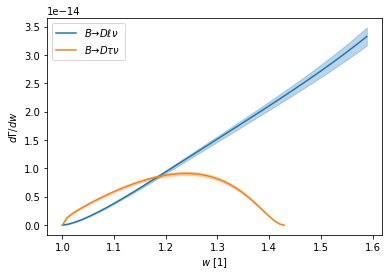

CPU times: user 31.6 s, sys: 148 ms, total: 31.7 s
Wall time: 31.7 s


In [12]:
%%time
rateD = np.array([BToD.dGamma_dw(w_) for w_ in wrD])
rateDtau = np.array([BToD_tau.dGamma_dw(w_) for w_ in wrDtau])

plot_errorband(wrD, rateD, label=r'$B\to D \ell \nu$')
plot_errorband(wrDtau, rateDtau, label=r'$B\to D \tau \nu$')
plt.xlabel('$w$ [1]')
plt.ylabel('$d\\Gamma/dw$')
plt.legend()
plt.show()
plt.close()

del rateD
del rateDtau

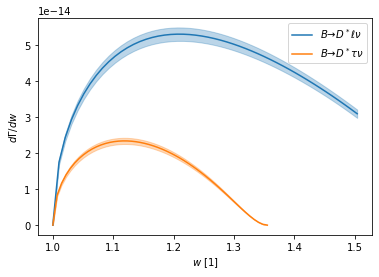

CPU times: user 3min 17s, sys: 1.02 s, total: 3min 18s
Wall time: 3min 18s


In [13]:
%%time
rateDs = np.array([BToDStar.dGamma_dw(w_) for w_ in wrDs])
rateDstau = np.array([BToDStar_tau.dGamma_dw(w_) for w_ in wrDstau])

plot_errorband(wrDs, rateDs, label=r'$B\to D^* \ell \nu$')
plot_errorband(wrDstau, rateDstau, label=r'$B\to D^* \tau \nu$')
# plot_errorband(wrDs, rateDs_ZMA, label=r'$B\to D^* \ell \nu$ (ZMA)')
plt.xlabel('$w$ [1]')
plt.ylabel('$d\\Gamma/dw$')
plt.legend()
plt.show()
plt.close()

del rateDs
del rateDstau

## ZMA Rates
This uses the effort2 angular rate implementation, which currently does not support lepton mass effects.

In [13]:
PLOT_ANGULAR = True

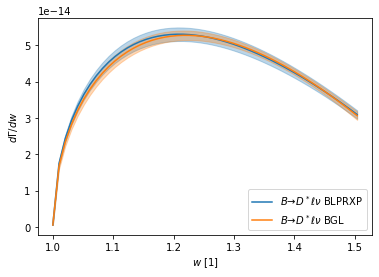

CPU times: user 1min 48s, sys: 759 ms, total: 1min 49s
Wall time: 1min 49s


In [23]:
%%time
if PLOT_ANGULAR:
    x = np.linspace(*BToDStar_ZMA.kinematics.w_range_numerical_stable)
    rateDs_ZMA = np.array([BToDStar_ZMA.dGamma_dw(w_) for w_ in x])
    rateDs_BGL_ZMA = np.array([BToDStar_BGL_ZMA.dGamma_dw(w_) for w_ in x])
    
    plot_errorband(x, rateDs_ZMA, label=r'$B\to D^* \ell \nu$ BLPRXP')
    # Plot rate with mass effects as overlay as cross-check. The line below should be removed for actual plots
    # plot_errorband(wrDs, rateDs, label=r'$B\to D^* \ell \nu$')
    # Plot BGL
    plot_errorband(x, rateDs_BGL_ZMA, label=r'$B\to D^* \ell \nu$ BGL')
    plt.xlabel('$w$ [1]')
    plt.ylabel('$d\\Gamma/dw$')
    plt.legend()
    plt.show()
    plt.close()  

    del rateDs_ZMA

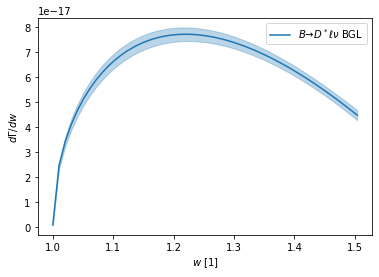

In [20]:

plot_errorband(x, rateDs_BGL_ZMA, label=r'$B\to D^* \ell \nu$ BGL')
plt.xlabel('$w$ [1]')
plt.ylabel('$d\\Gamma/dw$')
plt.legend()
plt.show()
plt.close()  

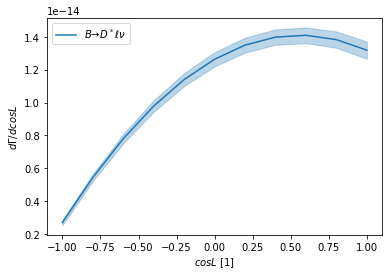

CPU times: user 5min 53s, sys: 1.51 s, total: 5min 54s
Wall time: 5min 54s


In [30]:
%%time
if PLOT_ANGULAR:
    x = np.linspace(*BToDStar_ZMA.kinematics.cosL_range, num=11)
    rateDs_ZMA = np.array([BToDStar_ZMA.dGamma_dcosL(cosL_) for cosL_ in x])

    plot_errorband(x, rateDs_ZMA, label=r'$B\to D^* \ell \nu$')
    plt.xlabel('$cosL$ [1]')
    plt.ylabel('$d\\Gamma/dcosL$')
    plt.legend()
    plt.show()
    plt.close()

    del rateDs_ZMA

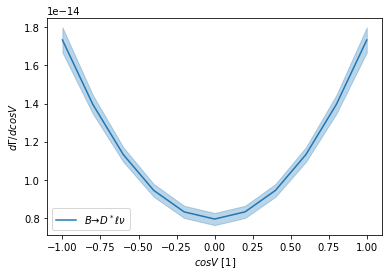

CPU times: user 5min 43s, sys: 1.49 s, total: 5min 45s
Wall time: 5min 44s


In [31]:
%%time
if PLOT_ANGULAR:
    x = np.linspace(*BToDStar_ZMA.kinematics.cosV_range, num=11)
    rateDs_ZMA = np.array([BToDStar_ZMA.dGamma_dcosV(cosV_) for cosV_ in x])

    plot_errorband(x, rateDs_ZMA, label=r'$B\to D^* \ell \nu$')
    plt.xlabel('$cosV$ [1]')
    plt.ylabel('$d\\Gamma/dcosV$')
    plt.legend()
    plt.show()
    plt.close()

    del rateDs_ZMA

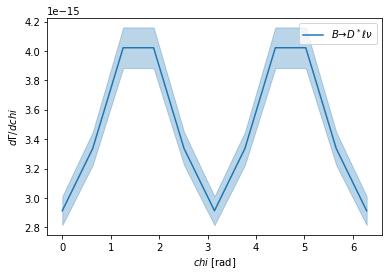

CPU times: user 9min 40s, sys: 2.65 s, total: 9min 43s
Wall time: 9min 42s


In [32]:
%%time
if PLOT_ANGULAR:
    x = np.linspace(*BToDStar_ZMA.kinematics.chi_range, num=11)
    rateDs_ZMA = np.array([BToDStar_ZMA.dGamma_dchi(chi_) for chi_ in x])

    plot_errorband(x, rateDs_ZMA, label=r'$B\to D^* \ell \nu$')
    plt.xlabel('$chi$ [rad]')
    plt.ylabel('$d\\Gamma/dchi$')
    plt.legend()
    plt.show()
    plt.close()

    del rateDs_ZMA

In [19]:
# %lprun -T lprof0 -f quad BToDStar_ZMA.dGamma_dchi(np.pi)

In [20]:
# %prun BToDStar_ZMA.dGamma_dchi(np.pi)

## BLPRXP Form Factor specific plots

Text(0, 0.5, '$\\xi(w)$')

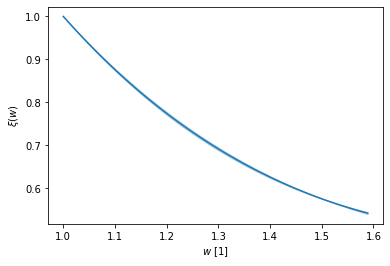

In [21]:
wr = wrD
plot_errorband(wr, FF_BToD.xi(wr))
plt.xlabel('$w$ [1]')
plt.ylabel('$\\xi(w)$')

Text(0, 0.5, '$h_{+}(w)$')

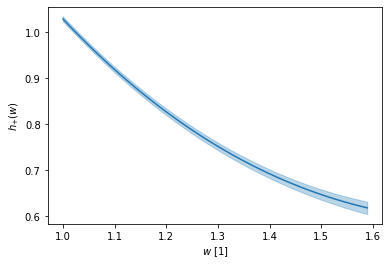

In [22]:
wr = wrD
plot_errorband(wr, FF_BToD.hp(wr))
plt.xlabel('$w$ [1]')
plt.ylabel('$h_{+}(w)$')

Text(0, 0.5, '$h_{-}(w)$')

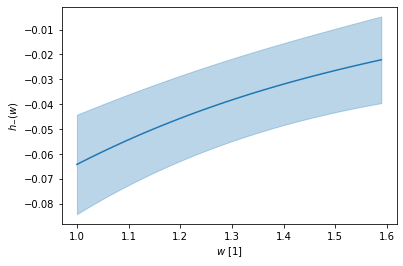

In [23]:
wr = wrD
plot_errorband(wr, FF_BToD.hm(wr))
plt.xlabel('$w$ [1]')
plt.ylabel('$h_{-}(w)$')

Text(0, 0.5, '$h_{A_{1}}(w)$')

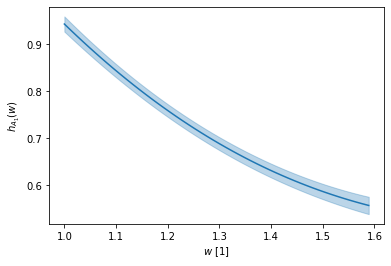

In [24]:
wr = wrD
plot_errorband(wr, FF_BToD.hA1(wr))
plt.xlabel('$w$ [1]')
plt.ylabel('$h_{A_{1}}(w)$')

Text(0, 0.5, '$h_{A_{2}}(w)$')

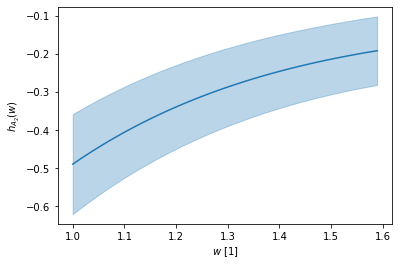

In [25]:
wr = wrD
plot_errorband(wr, FF_BToD.hA2(wr))
plt.xlabel('$w$ [1]')
plt.ylabel('$h_{A_{2}}(w)$')

Text(0, 0.5, '$h_{A_{3}}(w)$')

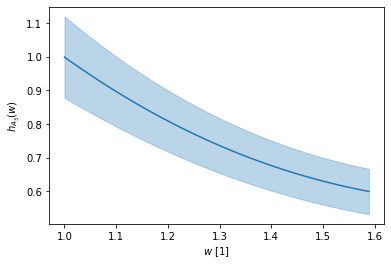

In [26]:
wr = wrD
plot_errorband(wr, FF_BToD.hA3(wr))
plt.xlabel('$w$ [1]')
plt.ylabel('$h_{A_{3}}(w)$')

Text(0, 0.5, '$h_{V}(w)$')

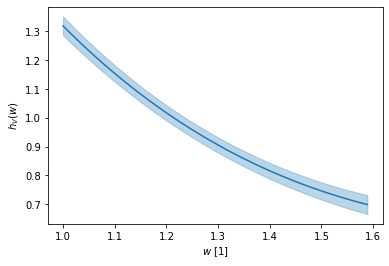

In [27]:
wr = wrD
plot_errorband(wr, FF_BToD.hV(wr))
plt.xlabel('$w$ [1]')
plt.ylabel('$h_{V}(w)$')

## Some more stuff for later